In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import matplotlib as mpl
import momlevel as ml
import gcsfs
import zarr
from matplotlib.ticker import FormatStrFormatter

In [2]:
mask_CM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/CM4_mask_antarctica.nc')
mask_ESM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/ESM4_mask_antarctica.nc')

In [3]:
temperature_pi_ESM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_esm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)

temperature_pi_CM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_cm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)



In [9]:
temp_CM4 = temperature_pi_CM4.temp
temp_ESM4 = temperature_pi_ESM4.temp

In [10]:
temp_seasonal_CM4 = temp_CM4.groupby('time.season').mean(dim='time')
temp_summer_CM4= temp_seasonal_CM4.sel(season= 'DJF')
temp_winter_CM4=temp_seasonal_CM4.sel(season='JJA')
temp_spring_CM4=temp_seasonal_CM4.sel(season='SON')
temp_fall_CM4=temp_seasonal_CM4.sel(season='MAM')

In [11]:
temp_seasonal_ESM4 = temp_ESM4.groupby('time.season').mean(dim='time')
temp_summer_ESM4= temp_seasonal_ESM4.sel(season= 'DJF')
temp_winter_ESM4=temp_seasonal_ESM4.sel(season='JJA')
temp_spring_ESM4=temp_seasonal_ESM4.sel(season='SON')
temp_fall_ESM4=temp_seasonal_ESM4.sel(season='MAM')

In [39]:
plateau_temp_total_CM4=(temp_CM4*(mask_CM4.plateau_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon').mean(dim='time')
ross_temp_total_CM4=(temp_CM4*(mask_CM4.ross_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon').mean(dim='time')
lowwest_temp_total_CM4=(temp_CM4*(mask_CM4.lowwest_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon').mean(dim='time')
loweast_temp_total_CM4=(temp_CM4*(mask_CM4.loweast_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon').mean(dim='time')
filchner_temp_total_CM4=(temp_CM4*(mask_CM4.filchner_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon').mean(dim='time')
peninsula_temp_total_CM4=(temp_CM4*(mask_CM4.peninsula_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon').mean(dim='time')

plateau_temp_total_ESM4=(temp_ESM4*(mask_ESM4.plateau_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon').mean(dim='time')
ross_temp_total_ESM4=(temp_ESM4*(mask_ESM4.ross_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon').mean(dim='time')
lowwest_temp_total_ESM4=(temp_ESM4*(mask_ESM4.lowwest_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon').mean(dim='time')
loweast_temp_total_ESM4=(temp_ESM4*(mask_ESM4.loweast_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon').mean(dim='time')
filchner_temp_total_ESM4=(temp_ESM4*(mask_ESM4.filchner_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon').mean(dim='time')
peninsula_temp_total_ESM4=(temp_ESM4*(mask_ESM4.peninsula_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon').mean(dim='time')

In [20]:
plateau_temp_summer_CM4=(temp_summer_CM4*(mask_CM4.plateau_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
ross_temp_summer_CM4=(temp_summer_CM4*(mask_CM4.ross_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
lowwest_temp_summer_CM4=(temp_summer_CM4*(mask_CM4.lowwest_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
loweast_temp_summer_CM4=(temp_summer_CM4*(mask_CM4.loweast_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
filchner_temp_summer_CM4=(temp_summer_CM4*(mask_CM4.filchner_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
peninsula_temp_summer_CM4=(temp_summer_CM4*(mask_CM4.peninsula_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')

plateau_temp_summer_ESM4=(temp_summer_ESM4*(mask_ESM4.plateau_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
ross_temp_summer_ESM4=(temp_summer_ESM4*(mask_ESM4.ross_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
lowwest_temp_summer_ESM4=(temp_summer_ESM4*(mask_ESM4.lowwest_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
loweast_temp_summer_ESM4=(temp_summer_ESM4*(mask_ESM4.loweast_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
filchner_temp_summer_ESM4=(temp_summer_ESM4*(mask_ESM4.filchner_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
peninsula_temp_summer_ESM4=(temp_summer_ESM4*(mask_ESM4.peninsula_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')

In [21]:
plateau_temp_winter_CM4=(temp_winter_CM4*(mask_CM4.plateau_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
ross_temp_winter_CM4=(temp_winter_CM4*(mask_CM4.ross_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
lowwest_temp_winter_CM4=(temp_winter_CM4*(mask_CM4.lowwest_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
loweast_temp_winter_CM4=(temp_winter_CM4*(mask_CM4.loweast_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
filchner_temp_winter_CM4=(temp_winter_CM4*(mask_CM4.filchner_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
peninsula_temp_winter_CM4=(temp_winter_CM4*(mask_CM4.peninsula_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')

plateau_temp_winter_ESM4=(temp_winter_ESM4*(mask_ESM4.plateau_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
ross_temp_winter_ESM4=(temp_winter_ESM4*(mask_ESM4.ross_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
lowwest_temp_winter_ESM4=(temp_winter_ESM4*(mask_ESM4.lowwest_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
loweast_temp_winter_ESM4=(temp_winter_ESM4*(mask_ESM4.loweast_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
filchner_temp_winter_ESM4=(temp_winter_ESM4*(mask_ESM4.filchner_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
peninsula_temp_winter_ESM4=(temp_winter_ESM4*(mask_ESM4.peninsula_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')

In [22]:
plateau_temp_fall_CM4=(temp_fall_CM4*(mask_CM4.plateau_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
ross_temp_fall_CM4=(temp_fall_CM4*(mask_CM4.ross_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
lowwest_temp_fall_CM4=(temp_fall_CM4*(mask_CM4.lowwest_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
loweast_temp_fall_CM4=(temp_fall_CM4*(mask_CM4.loweast_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
filchner_temp_fall_CM4=(temp_fall_CM4*(mask_CM4.filchner_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
peninsula_temp_fall_CM4=(temp_fall_CM4*(mask_CM4.peninsula_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')

plateau_temp_fall_ESM4=(temp_fall_ESM4*(mask_ESM4.plateau_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
ross_temp_fall_ESM4=(temp_fall_ESM4*(mask_ESM4.ross_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
lowwest_temp_fall_ESM4=(temp_fall_ESM4*(mask_ESM4.lowwest_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
loweast_temp_fall_ESM4=(temp_fall_ESM4*(mask_ESM4.loweast_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
filchner_temp_fall_ESM4=(temp_fall_ESM4*(mask_ESM4.filchner_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
peninsula_temp_fall_ESM4=(temp_fall_ESM4*(mask_ESM4.peninsula_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')

In [23]:
plateau_temp_spring_CM4=(temp_spring_CM4*(mask_CM4.plateau_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
ross_temp_spring_CM4=(temp_spring_CM4*(mask_CM4.ross_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
lowwest_temp_spring_CM4=(temp_spring_CM4*(mask_CM4.lowwest_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
loweast_temp_spring_CM4=(temp_spring_CM4*(mask_CM4.loweast_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
filchner_temp_spring_CM4=(temp_spring_CM4*(mask_CM4.filchner_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
peninsula_temp_spring_CM4=(temp_spring_CM4*(mask_CM4.peninsula_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')

plateau_temp_spring_ESM4=(temp_spring_ESM4*(mask_ESM4.plateau_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
ross_temp_spring_ESM4=(temp_spring_ESM4*(mask_ESM4.ross_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
lowwest_temp_spring_ESM4=(temp_spring_ESM4*(mask_ESM4.lowwest_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
loweast_temp_spring_ESM4=(temp_spring_ESM4*(mask_ESM4.loweast_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
filchner_temp_spring_ESM4=(temp_spring_ESM4*(mask_ESM4.filchner_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
peninsula_temp_spring_ESM4=(temp_spring_ESM4*(mask_ESM4.peninsula_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')

In [40]:
plat_value_CM4_total=print(plateau_temp_total_CM4.values)
ross_value_CM4_total= print(ross_temp_total_CM4.values)
west_value_CM4_total=print(lowwest_temp_total_CM4.values)
east_value_CM4_total=print(loweast_temp_total_CM4.values)
filch_value_CM4_total=print(filchner_temp_total_CM4.values)
pen_value_CM4_total=print(peninsula_temp_total_CM4.values)

223.82227
233.96466
230.10686
233.02289
233.01022
238.5868


In [41]:
plat_value_ESM4_total=print(plateau_temp_total_ESM4.values)
ross_value_ESM4_total= print(ross_temp_total_ESM4.values)
west_value_ESM4_total=print(lowwest_temp_total_ESM4.values)
east_value_ESM4_total=print(loweast_temp_total_ESM4.values)
filch_value_ESM4_total=print(filchner_temp_total_ESM4.values)
pen_value_ESM4_total=print(peninsula_temp_total_ESM4.values)

227.58438
232.59732
231.27171
233.04433
232.42015
235.1494


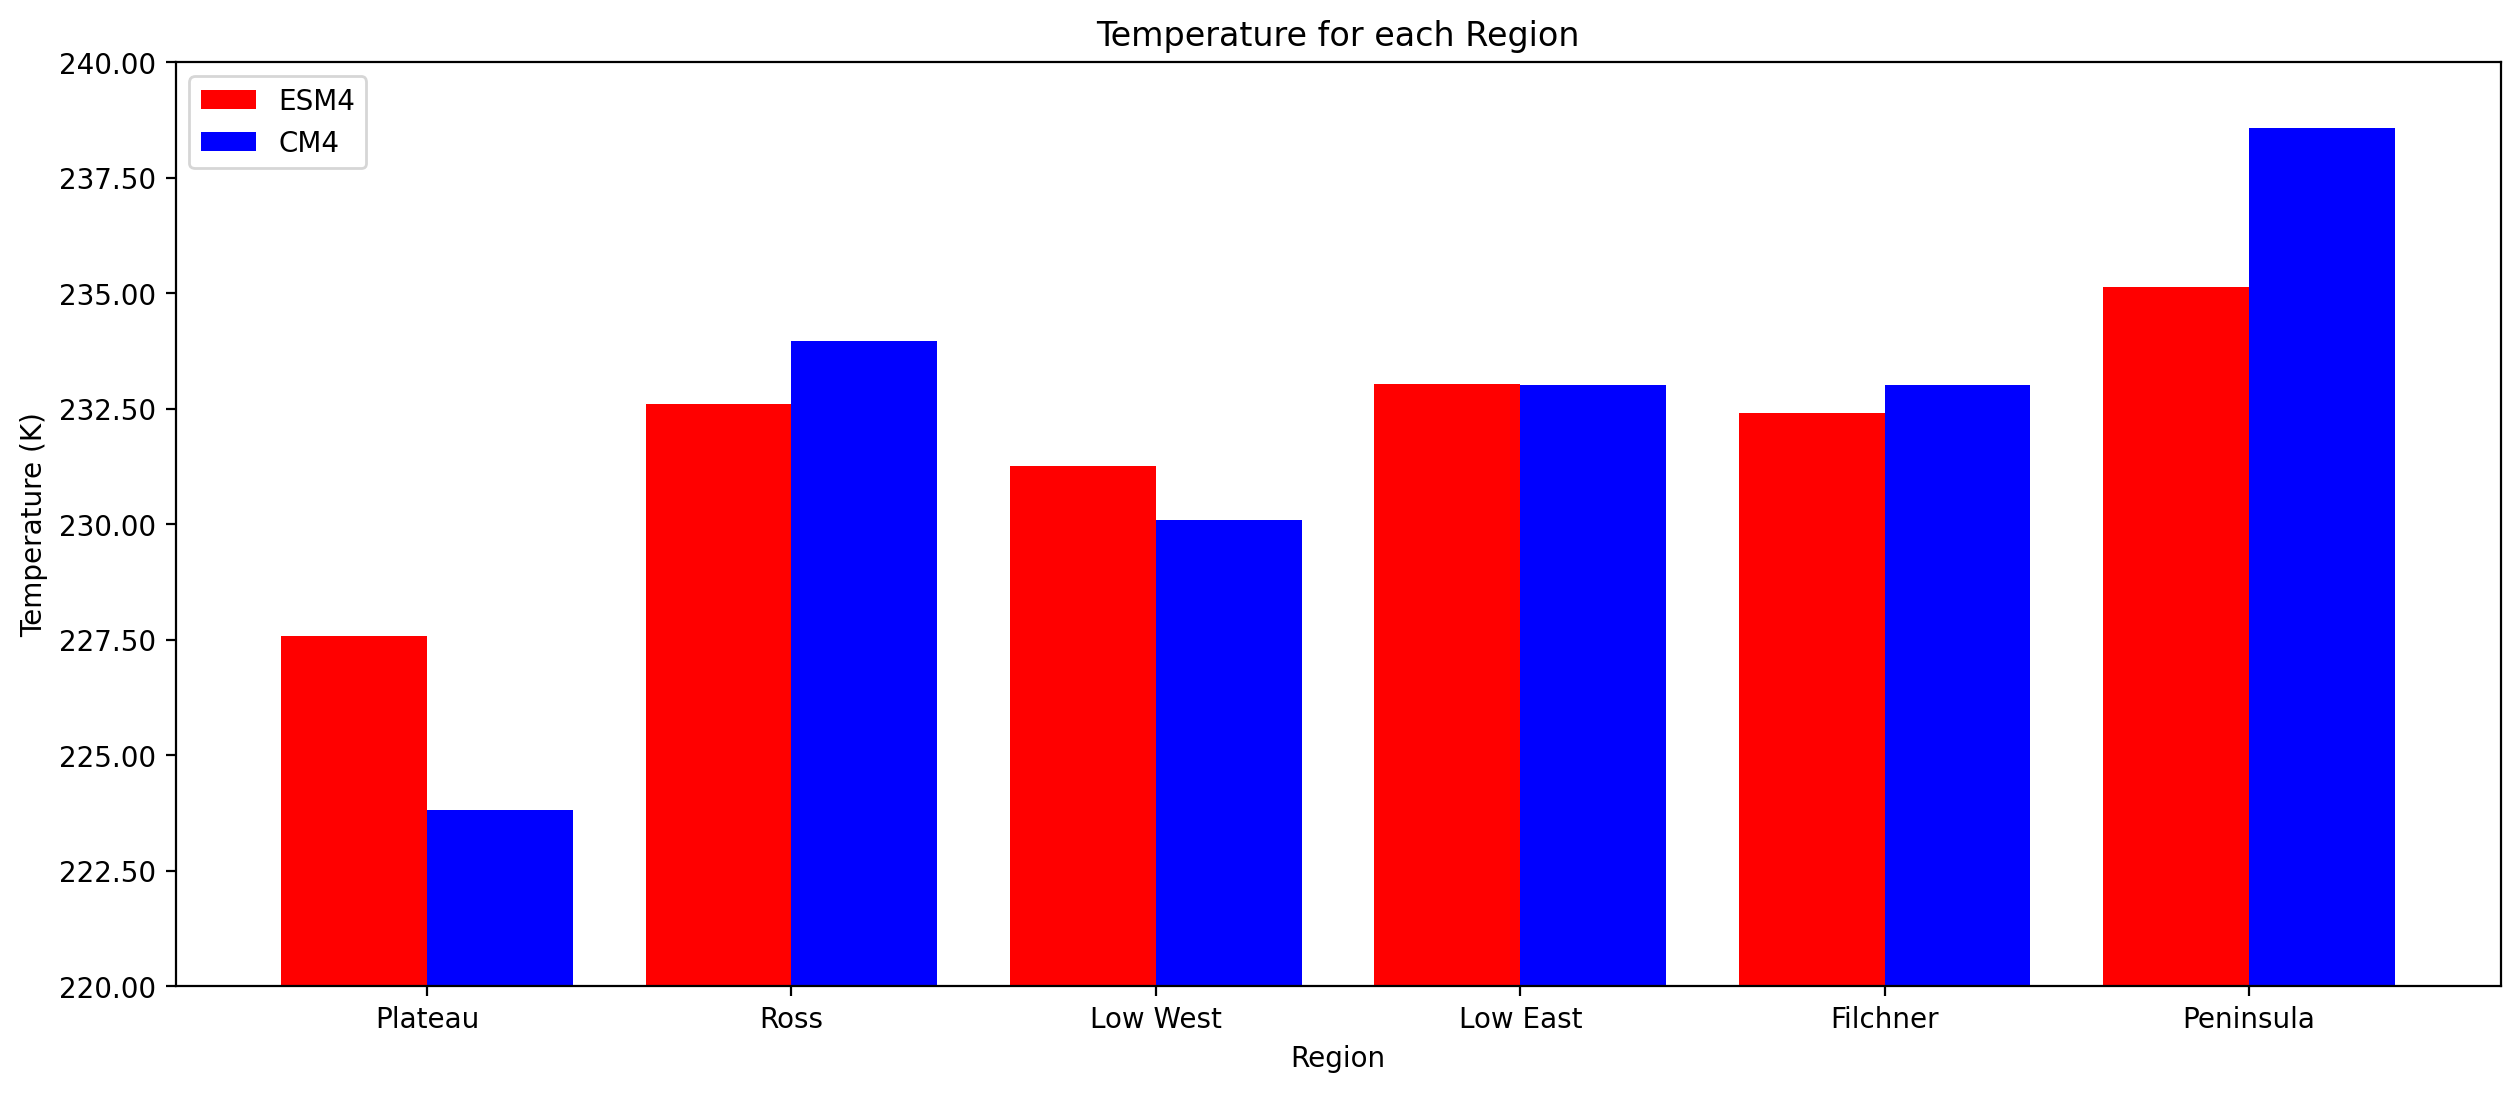

In [43]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4 = [223.82227,
233.96466,
230.10686,
233.02289,
233.01022,
238.5868] 
ESM4 = [227.58438,
232.59732,
231.27171,
233.04433,
232.42015,
235.1494] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, ESM4, 0.4, label = 'ESM4', color='r') 
plt.bar(X_axis + 0.2, CM4, 0.4, label = 'CM4', color= 'blue') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Temperature (K)") 
plt.title("Temperature for each Region") 
plt.legend() 
plt.ylim(220,240)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show() 








In [24]:
plat_value_CM4_summer=print(plateau_temp_summer_CM4.values)
ross_value_CM4_summer= print(ross_temp_summer_CM4.values)
west_value_CM4_summer=print(lowwest_temp_summer_CM4.values)
east_value_CM4_summer=print(loweast_temp_summer_CM4.values)
filch_value_CM4_summer=print(filchner_temp_summer_CM4.values)
pen_value_CM4_summer=print(peninsula_temp_summer_CM4.values)

237.9152
247.34052
243.50017
243.92659
246.79234
248.6589


In [25]:
plat_value_ESM4_summer=print(plateau_temp_summer_ESM4.values)
ross_value_ESM4_summer= print(ross_temp_summer_ESM4.values)
west_value_ESM4_summer=print(lowwest_temp_summer_ESM4.values)
east_value_ESM4_summer=print(loweast_temp_summer_ESM4.values)
filch_value_ESM4_summer=print(filchner_temp_summer_ESM4.values)
pen_value_ESM4_summer=print(peninsula_temp_summer_ESM4.values)

243.57416
247.21832
245.98804
245.40067
246.96098
247.35742


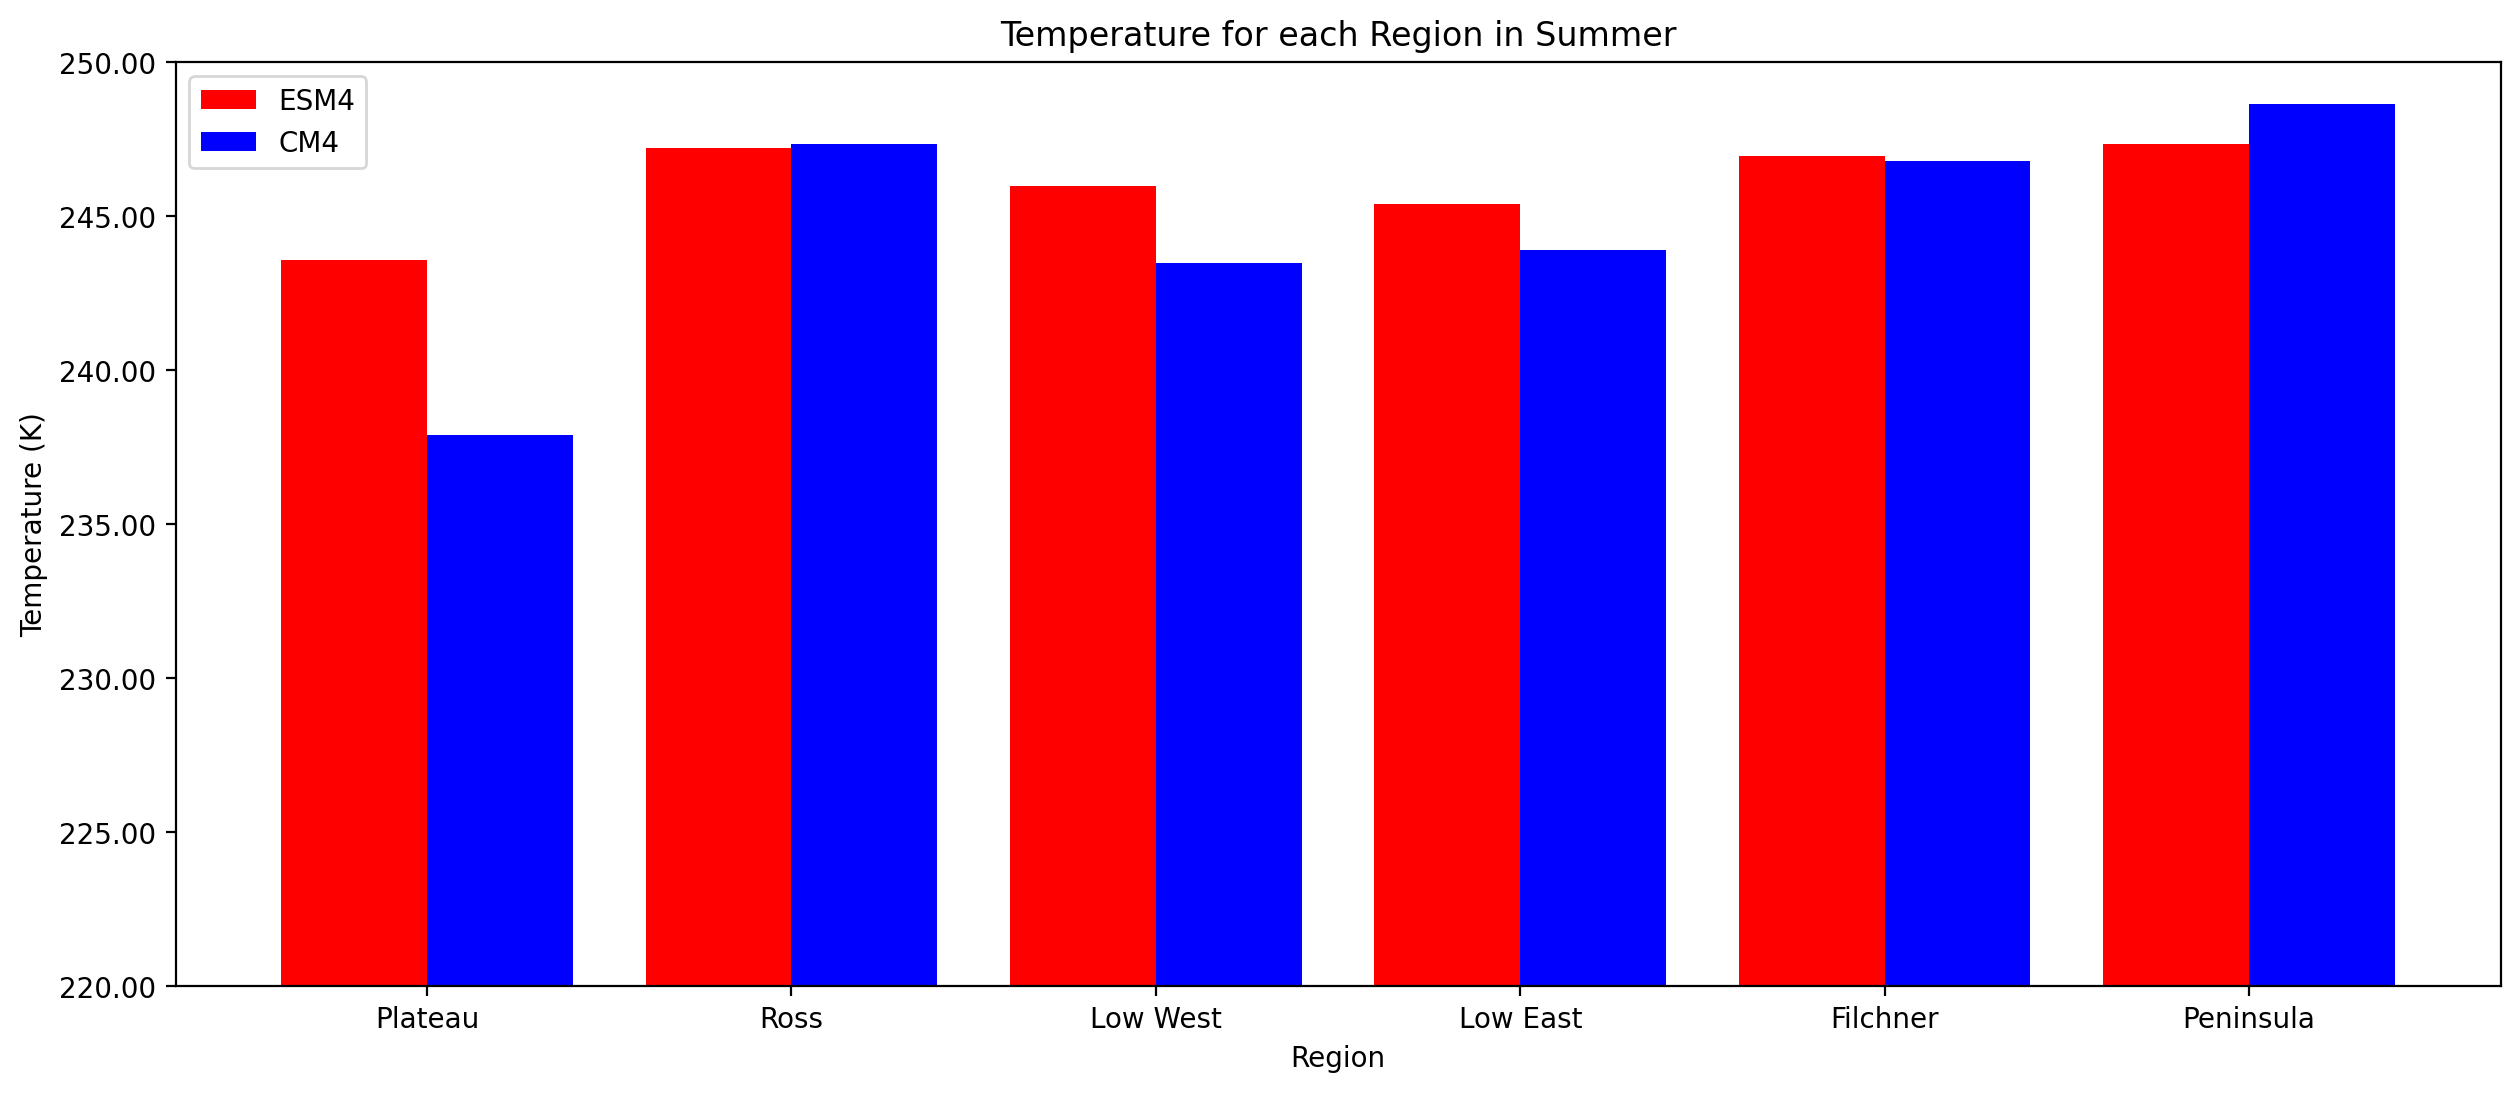

In [26]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4 = [237.9152,
247.34052,
243.50017,
243.92659,
246.79234,
248.6589] 
ESM4 = [243.57416,
247.21832,
245.98804,
245.40067,
246.96098,
247.35742] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, ESM4, 0.4, label = 'ESM4', color='r') 
plt.bar(X_axis + 0.2, CM4, 0.4, label = 'CM4', color= 'blue') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Temperature (K)") 
plt.title("Temperature for each Region in Summer") 
plt.legend() 
plt.ylim(220,250)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show() 








In [27]:
plat_value_CM4_winter=print(plateau_temp_winter_CM4.values)
ross_value_CM4_winter= print(ross_temp_winter_CM4.values)
west_value_CM4_winter=print(lowwest_temp_winter_CM4.values)
east_value_CM4_winter=print(loweast_temp_winter_CM4.values)
filch_value_CM4_winter=print(filchner_temp_winter_CM4.values)
pen_value_CM4_winter=print(peninsula_temp_winter_CM4.values)

211.0074
221.2857
217.81888
222.40872
220.90349
228.88927


In [28]:
plat_value_ESM4_winter=print(plateau_temp_winter_ESM4.values)
ross_value_ESM4_winter= print(ross_temp_winter_ESM4.values)
west_value_ESM4_winterr=print(lowwest_temp_winter_ESM4.values)
east_value_ESM4_winter=print(loweast_temp_winter_ESM4.values)
filch_value_ESM4_winter=print(filchner_temp_winter_ESM4.values)
pen_value_ESM4_winter=print(peninsula_temp_winter_ESM4.values)

211.80536
219.6623
217.68489
221.16179
219.70515
225.01628


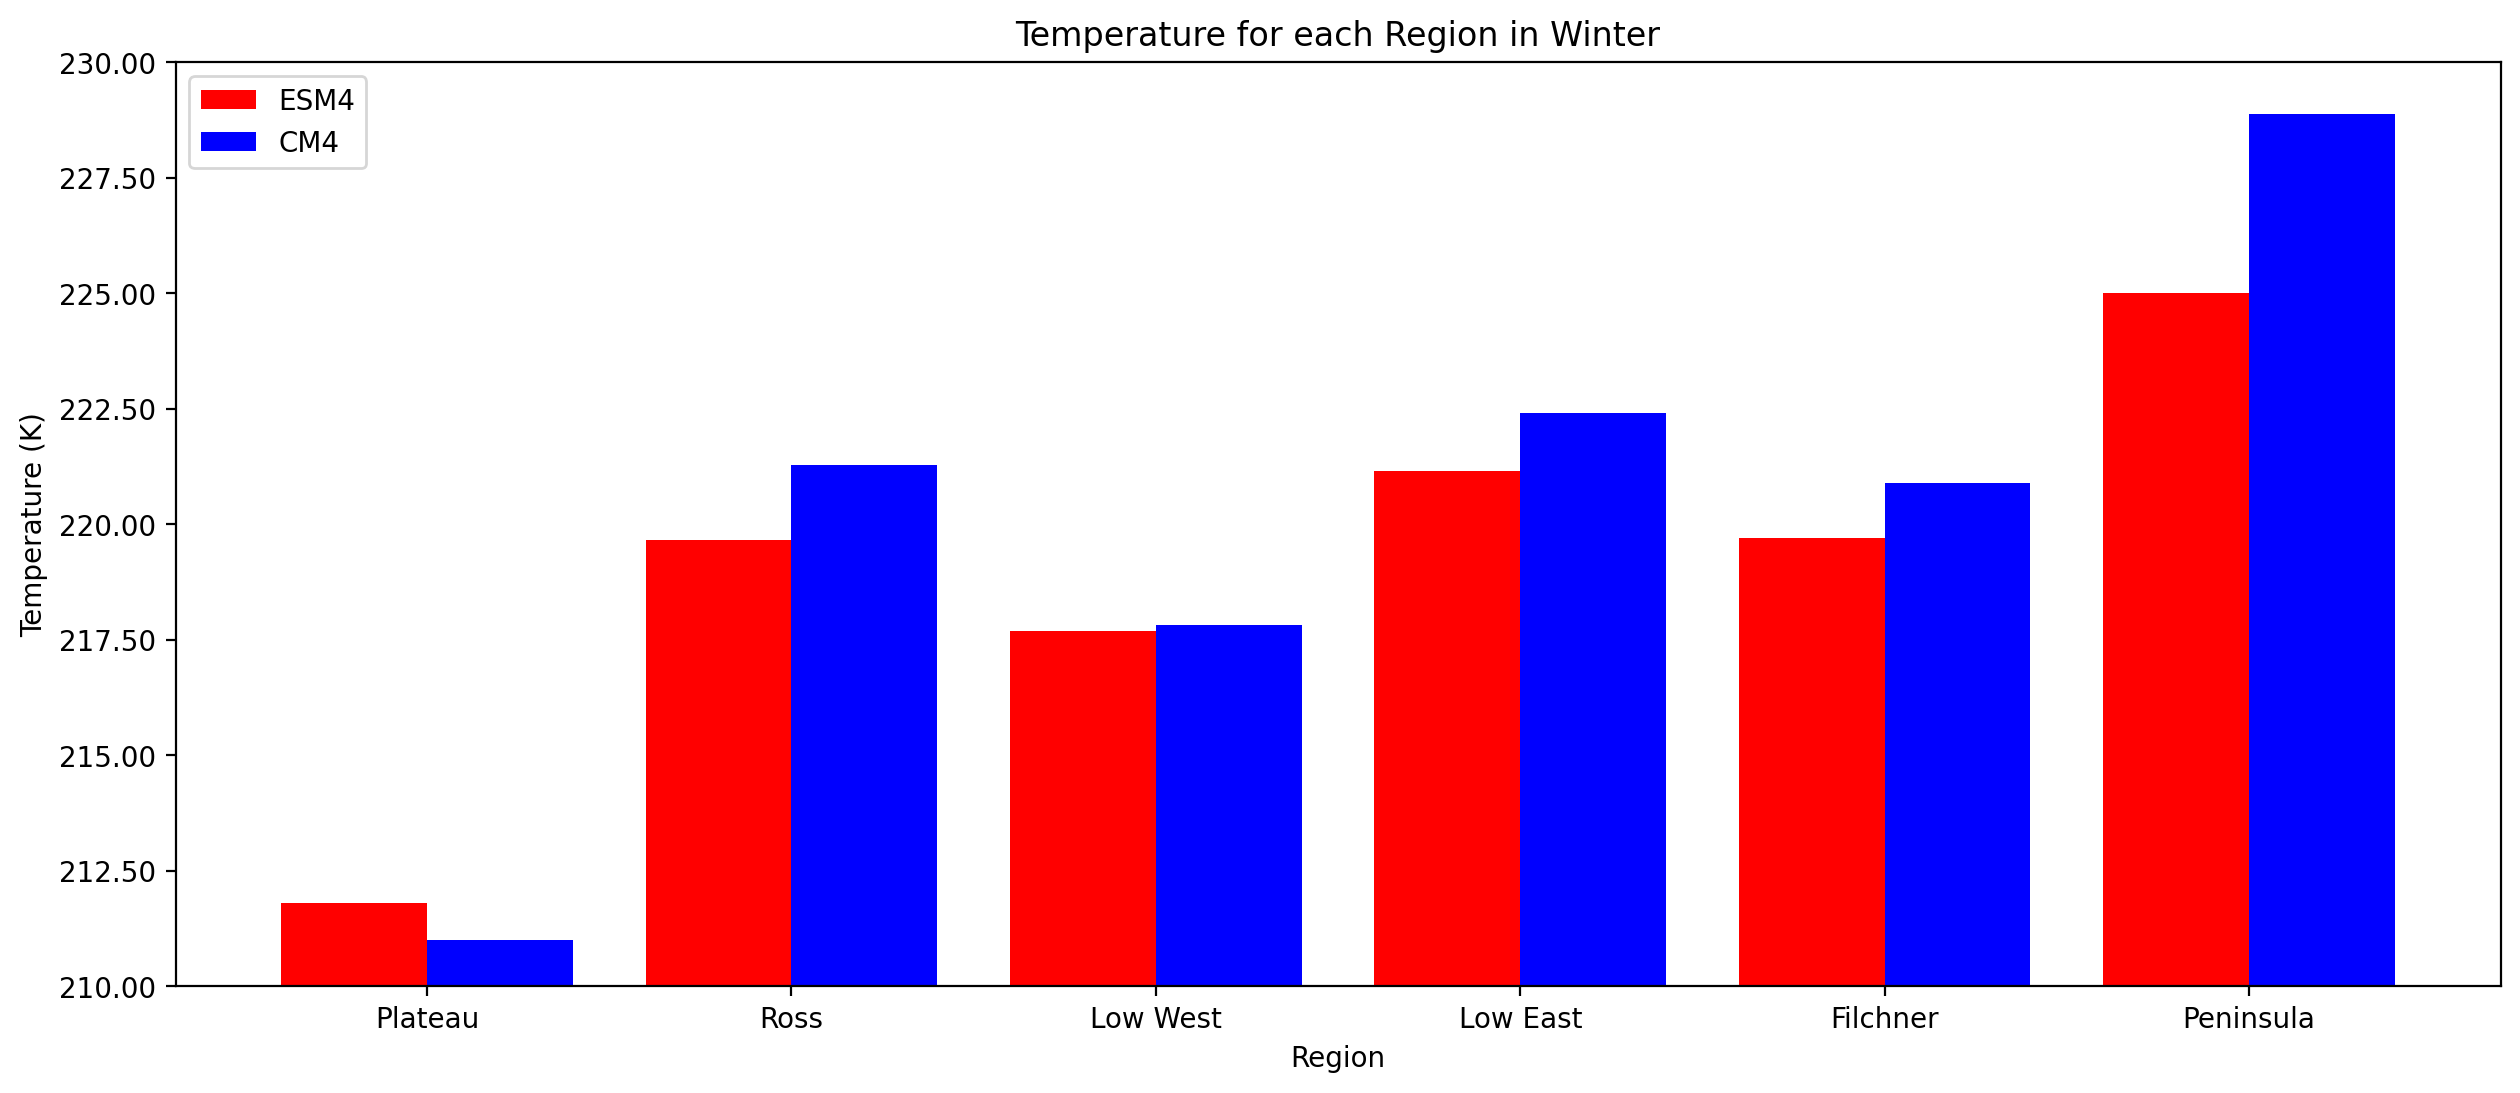

In [29]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4 = [211.0074,
221.2857,
217.81888,
222.40872,
220.90349,
228.88927
] 
ESM4 = [211.80536,
219.6623,
217.68489,
221.16179,
219.70515,
225.01628] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, ESM4, 0.4, label = 'ESM4', color='r') 
plt.bar(X_axis + 0.2, CM4, 0.4, label = 'CM4', color= 'blue') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Temperature (K)") 
plt.title("Temperature for each Region in Winter") 
plt.legend() 
plt.ylim(210,230)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show() 








In [30]:
plat_value_CM4_fall=print(plateau_temp_fall_CM4.values)
ross_value_CM4_fall= print(ross_temp_fall_CM4.values)
west_value_CM4_fall=print(lowwest_temp_fall_CM4.values)
east_value_CM4_fall=print(loweast_temp_fall_CM4.values)
filch_value_CM4_fall=print(filchner_temp_fall_CM4.values)
pen_value_CM4_fall=print(peninsula_temp_fall_CM4.values)

223.2136
233.22324
229.8781
232.38487
232.41486
238.96733


In [31]:
plat_value_ESM4_fall=print(plateau_temp_fall_ESM4.values)
ross_value_ESM4_fall= print(ross_temp_fall_ESM4.values)
west_value_ESM4_fall=print(lowwest_temp_fall_ESM4.values)
east_value_ESM4_fall=print(loweast_temp_fall_ESM4.values)
filch_value_ESM4_fall=print(filchner_temp_fall_ESM4.values)
pen_value_ESM4_fall=print(peninsula_temp_fall_ESM4.values)

224.55159
230.71411
228.98859
230.75299
230.25726
233.87589


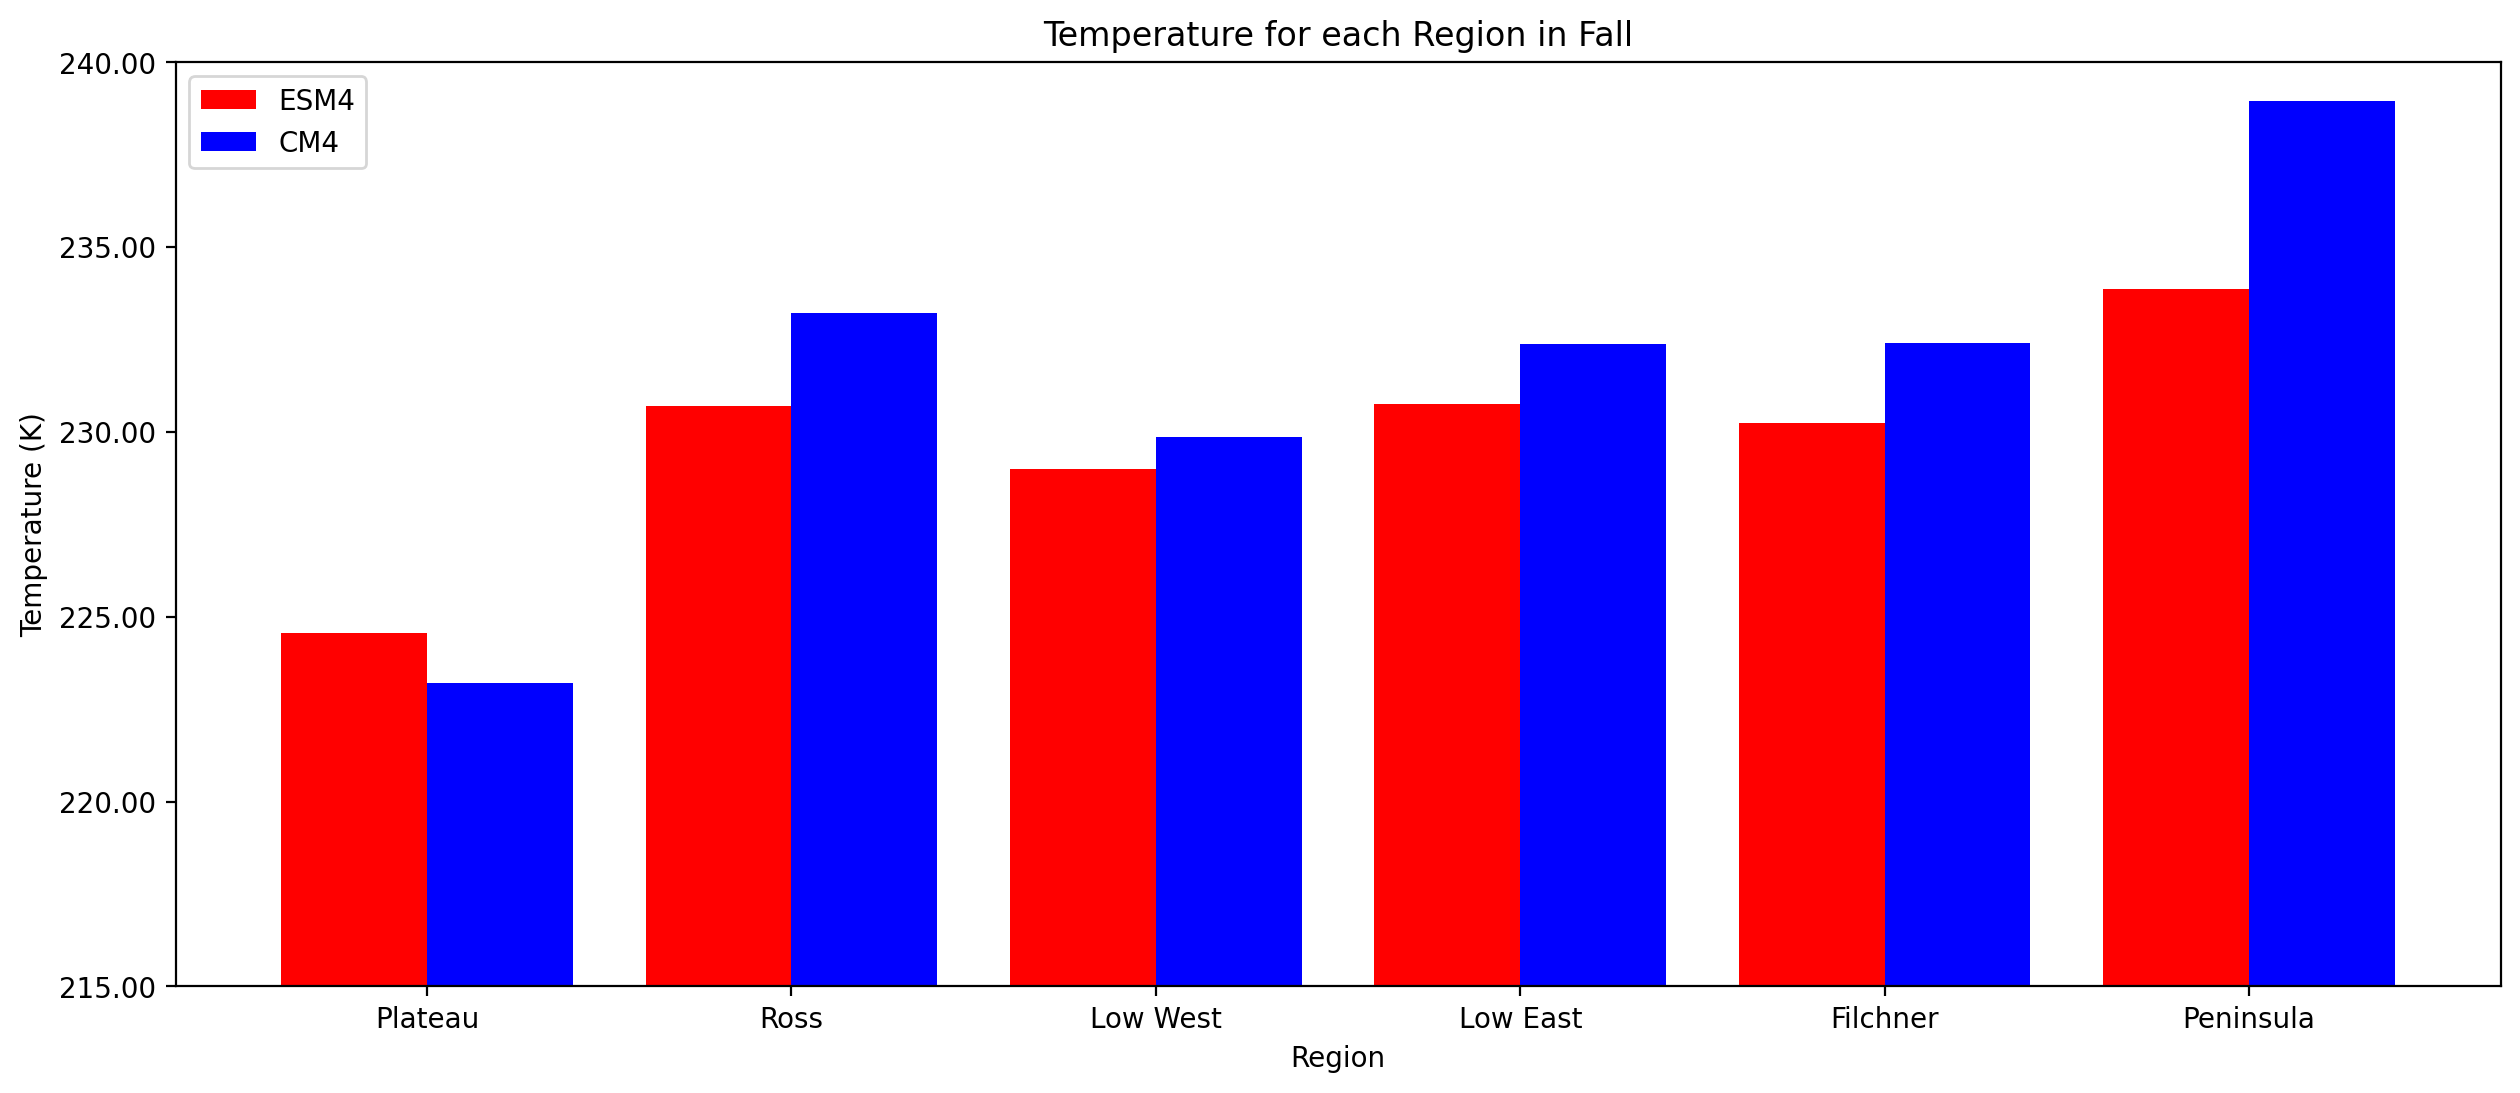

In [32]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4 = [223.2136,
233.22324,
229.8781,
232.38487,
232.41486,
238.96733
] 
ESM4 = [224.55159,
230.71411,
228.98859,
230.75299,
230.25726,
233.87589] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, ESM4, 0.4, label = 'ESM4', color='r') 
plt.bar(X_axis + 0.2, CM4, 0.4, label = 'CM4', color= 'blue') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Temperature (K)") 
plt.title("Temperature for each Region in Fall") 
plt.legend() 
plt.ylim(215,240)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show() 








In [33]:
plat_value_CM4_spring=print(plateau_temp_spring_CM4.values)
ross_value_CM4_spring= print(ross_temp_spring_CM4.values)
west_value_CM4_spring=print(lowwest_temp_spring_CM4.values)
east_value_CM4_spring=print(loweast_temp_spring_CM4.values)
filch_value_CM4_spring=print(filchner_temp_spring_CM4.values)
pen_value_CM4_spring=print(peninsula_temp_spring_CM4.values)

223.15291
234.00923
229.2303
233.37134
231.93024
237.83176


In [34]:
plat_value_ESM4_spring=print(plateau_temp_spring_ESM4.values)
ross_value_ESM4_spring= print(ross_temp_spring_ESM4.values)
west_value_ESM4_spring=print(lowwest_temp_spring_ESM4.values)
east_value_ESM4_spring=print(loweast_temp_spring_ESM4.values)
filch_value_ESM4_spring=print(filchner_temp_spring_ESM4.values)
pen_value_ESM4_spring=print(peninsula_temp_spring_ESM4.values)

230.66292
235.07298
233.54503
235.81972
234.6562
237.28159


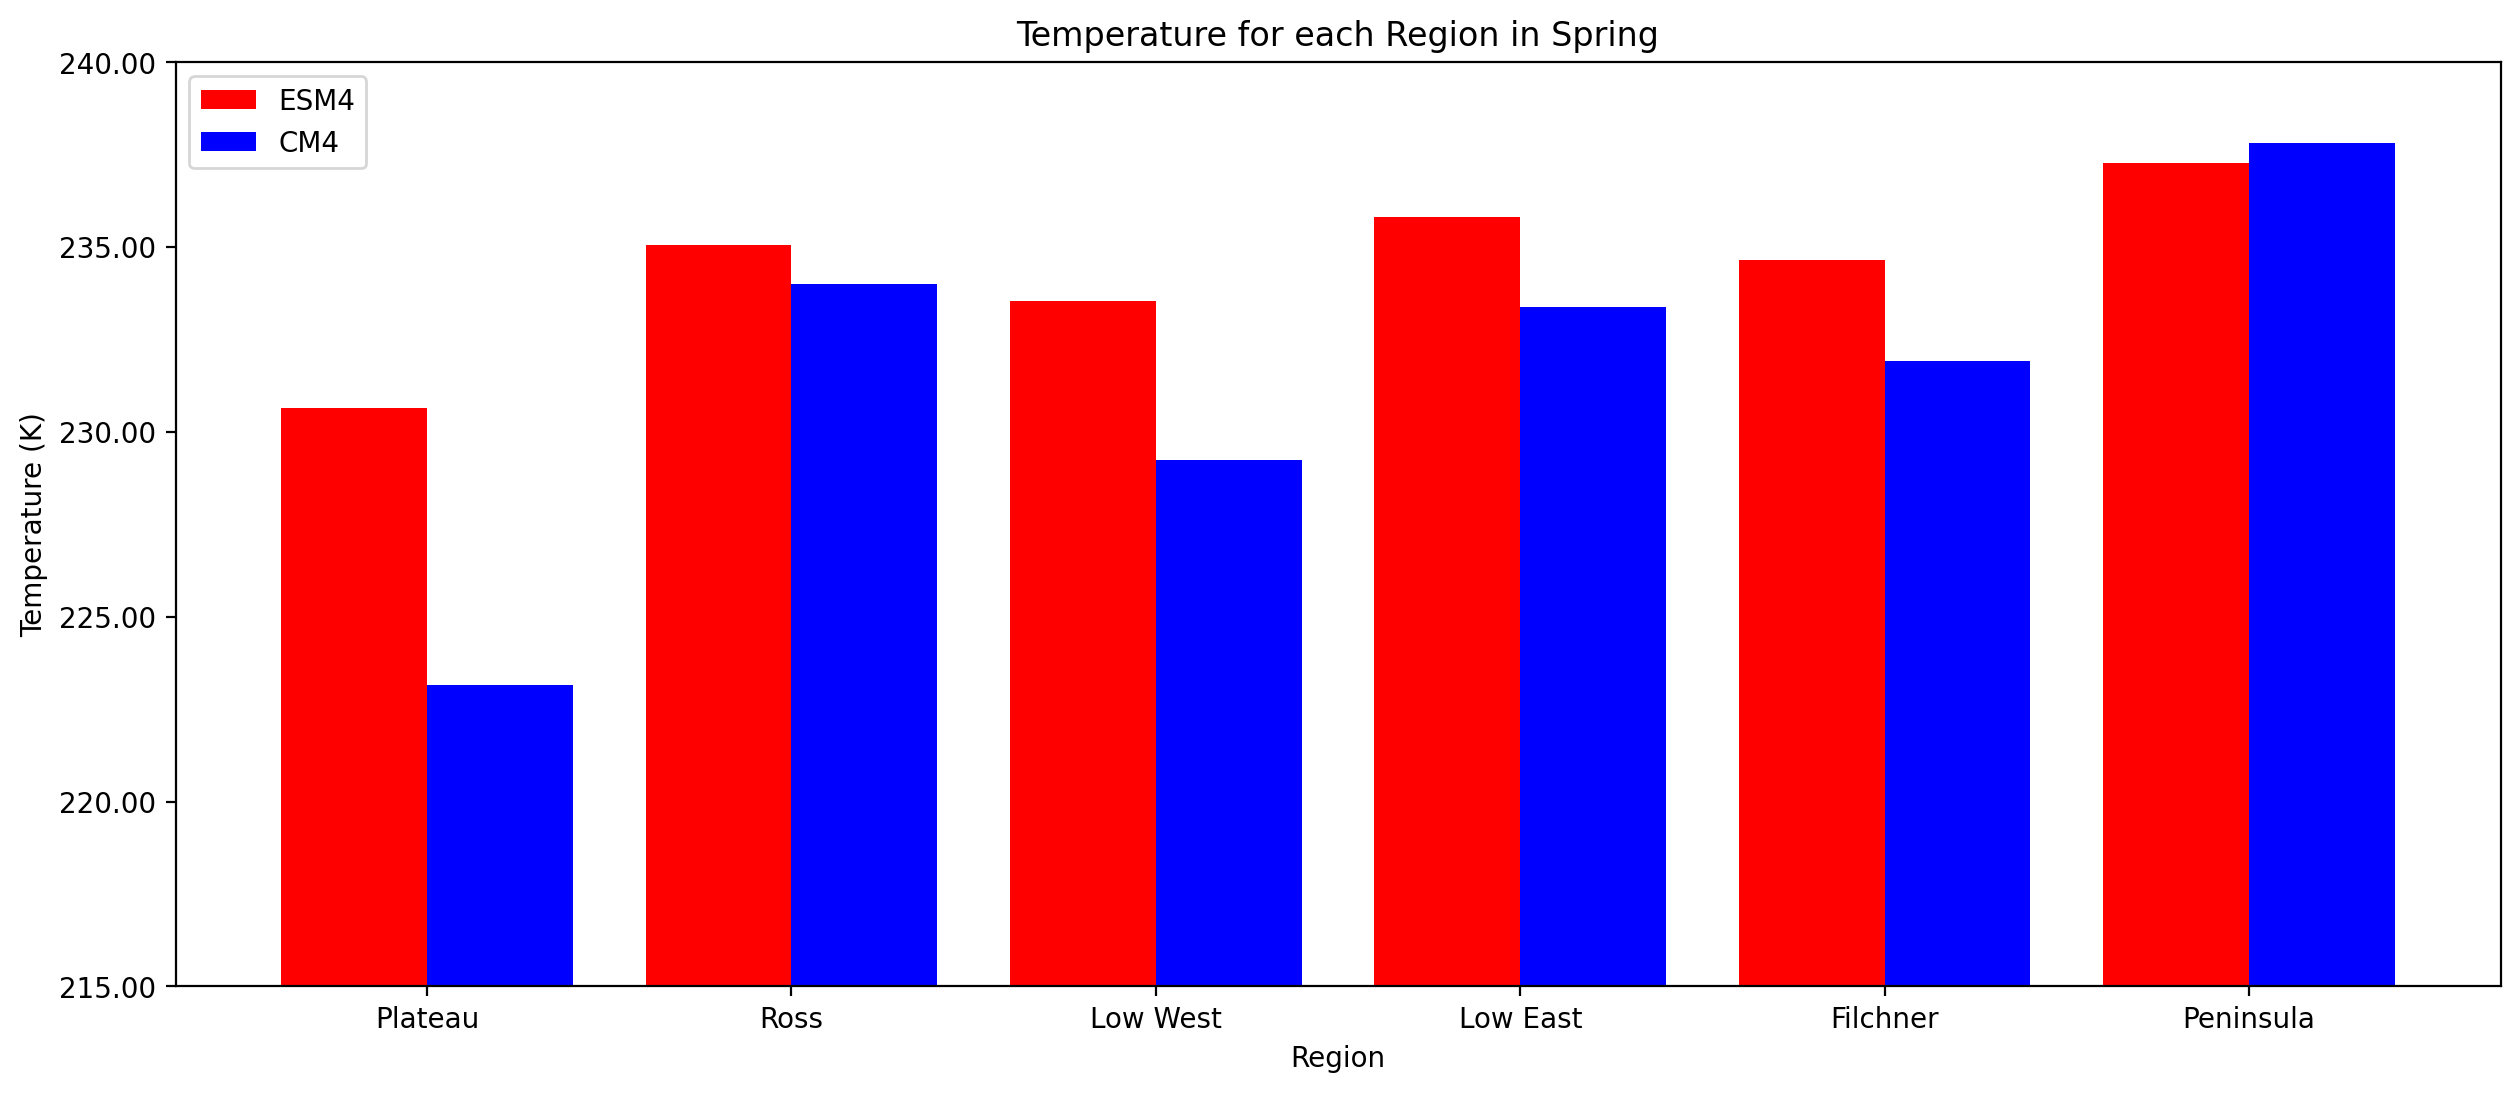

In [35]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4 = [223.15291,
234.00923,
229.2303,
233.37134,
231.93024,
237.83176
] 
ESM4 = [230.66292,
235.07298,
233.54503,
235.81972,
234.6562,
237.28159] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, ESM4, 0.4, label = 'ESM4', color='r') 
plt.bar(X_axis + 0.2, CM4, 0.4, label = 'CM4', color= 'blue') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Temperature (K)") 
plt.title("Temperature for each Region in Spring") 
plt.legend() 
plt.ylim(215,240)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show() 






